# Specifichiamo endpont e parametri per le SPARQL queries

In [1]:
%endpoint https://query.wikidata.org/sparql
%format any
%display table
%show all

Endpoint set to: https://query.wikidata.org/sparql
Request format: ANY
Display: table
Result maximum size: unlimited

# Importiamo seaborn e matplotlib per le visualizzazioni

In [10]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



# Query 1
## Numero di persone su Wikidata

In [2]:
SELECT (COUNT(?person) AS ?peopleCount)
WHERE {
	?person wdt:P31/wdt:P279* wd:Q5  .
}

peopleCount
11105107


# Query 2
## Numero artisti su Wikidata

In [3]:
SELECT (COUNT(DISTINCT ?artist) AS ?artistsCount)
WHERE {
    #?artist wdt:P31 wd:Q5. Dà runtime.
    ?artist wdt:P106/wdt:P279+ wd:Q483501.
}

artistsCount
4703356


# Viz 1
## Artisti su Wikidata

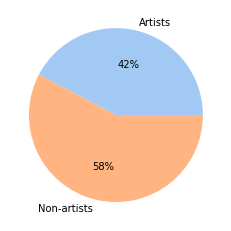

In [11]:
#define data
data = [42.3, 57.7]
labels = ['Artists', 'Non-artists']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Query 3
## I 'mental disorders' su Wikidata

In [4]:
SELECT DISTINCT ?mentalDisorderLabel 
WHERE {
    ?s wdt:P1050/wdt:P279* ?mentalDisorder;
       wdt:P31 wd:Q5.
    {?mentalDisorder wdt:P279* wd:Q12135} UNION {?mentalDisorder wdt:P31* wd:Q12135}.
    ?mentalDisorder rdfs:label ?mentalDisorderLabel.
    FILTER (lang(?mentalDisorderLabel) = "en")
}

mentalDisorderLabel
dementia
learning disability
transmissible spongiform encephalopathy
progressive supranuclear palsy
postpartum depression
dyscalculia
Muscle dysmorphia
histrionic personality disorder
excoriation disorder
problem gambling


# Query 4
## Numero artisti affetti da 'mental disorders'

In [5]:
SELECT  (COUNT (DISTINCT ?artist) as ?artistsCount) 
WHERE { 
  #?artist wdt:P31 wd:Q5. 
  ?artist wdt:P106/wdt:P279+ wd:Q483501.
  ?artist wdt:P1050/wdt:P279+ wd:Q12135.
}  

artistsCount
1470


# Query 5
## Artisti e relativi 'mental disorders'

In [6]:
SELECT DISTINCT ?artistLabel (group_concat(DISTINCT ?medicalConditionLabel; separator=", ") as ?medicalConditions)  
WHERE {
      ?artist wdt:P106/wdt:P279+ wd:Q483501.
      ?artist wdt:P1050 ?medicalCondition.
      ?medicalCondition wdt:P279+ wd:Q12135.
      ?medicalCondition rdfs:label ?medicalConditionLabel.
      FILTER (lang(?medicalConditionLabel) = "en")
      SERVICE wikibase:label {bd:serviceParam wikibase:language "en".}    }
GROUP BY ?artistLabel

artistLabel,medicalConditions
Mary Lambert,bipolar disorder
Ivana Brlić-Mažuranić,major depressive disorder
Lisa Nicole Carson,bipolar disorder
Gro Dahle,Asperger syndrome
Oliver Sacks,prosopagnosia
Cat Burns,"autism, attention deficit hyperactivity disorder"
Evelina,autism
FouseyTube,bipolar disorder
Maya Hawke,dyslexia
Peter Winiwarter,bipolar disorder


# Query 6
## Numero di artisti per ciascun 'disturbo mentale'

In [7]:
SELECT ?diseaseLabel (count(distinct ?artist) as ?artistNumber)
WHERE {
      ?artist wdt:P106/wdt:P279+ wd:Q483501.
      ?artist wdt:P1050 ?disease.
      ?disease wdt:P279+ wd:Q12135.
      ?disease rdfs:label ?diseaseLabel.
      FILTER (lang(?diseaseLabel) = "en")
}
GROUP BY ?diseaseLabel
ORDER BY DESC (?artistNumber)

diseaseLabel,artistNumber
bipolar disorder,266
dyslexia,211
autism,199
stuttering,123
attention deficit hyperactivity disorder,104
Asperger syndrome,103
schizophrenia,101
mental depression,98
alcoholism,48
obsessive-compulsive disorder,37


# Viz 2
## Numero di artisti per diturbo

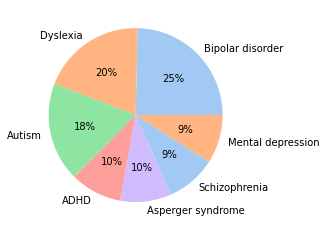

In [15]:
#define data
data = [24.6,19.5, 18.4, 9.6, 9.5, 9.3, 9.0]
labels = ['Bipolar disorder', 'Dyslexia', 'Autism', 'ADHD', 'Asperger syndrome', 'Schizophrenia', 'Mental depression']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Query 7
## Numero di artisti con mental disorder divisi per occupazione.

In [8]:
SELECT ?occupationLabel (count(distinct ?artist) as ?artistNumber)
WHERE {
      ?artist wdt:P106 ?occupation.
      ?occupation wdt:P279+ wd:Q483501.
      ?occupation rdfs:label ?occupationLabel.
      ?artist wdt:P1050 ?disease.
      ?disease wdt:P279+ wd:Q12135.
      FILTER (lang(?occupationLabel) = "en")
}
GROUP BY ?occupationLabel
ORDER BY DESC (?artistNumber) 

occupationLabel,artistNumber
writer,401
actor,360
singer,263
film actor,219
television actor,193
screenwriter,170
musician,138
composer,122
singer-songwriter,112
poet,104


# Viz 3
## Artisti affetti da disorder con occupazione

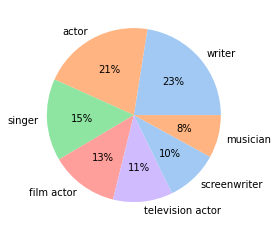

In [16]:
#define data
data = [22.3,20.6, 15.1, 12.5, 11, 9.7, 7.9]
labels = ['writer', 'actor', 'singer', 'film actor', 'television actor', 'screenwriter', 'musician']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Query 8	
## Artisti con mental disorders e relative date di nascita e morte

In [9]:
SELECT DISTINCT ?artistLabel ?dateOfBirth ?dateOfDeath
WHERE {
      ?artist wdt:P106/wdt:P279+ wd:Q483501;
              rdfs:label ?artistLabel;
              wdt:P569 ?dateOfBirth;
              wdt:P570 ?dateOfDeath;
              wdt:P1050 ?medicalCondition.
      ?medicalCondition wdt:P279+ wd:Q12135.
      FILTER (lang(?artistLabel) = "en")
  }
ORDER BY ?dateOfBirth

artistLabel,dateOfBirth,dateOfDeath
Demosthenes,-0383-01-01T00:00:00Z,-0321-10-07T00:00:00Z
Aristotle,-0383-01-01T00:00:00Z,-0321-01-01T00:00:00Z
Han Fei,-0279-01-01T00:00:00Z,-0232-01-01T00:00:00Z
Sima Xiangru,-0178-01-01T00:00:00Z,-0116-01-01T00:00:00Z
Yang Xiong,-0052-01-01T00:00:00Z,0018-01-01T00:00:00Z
Claudius,-0009-07-30T00:00:00Z,0054-10-11T00:00:00Z
Notker the Stammerer,0840-01-01T00:00:00Z,0912-04-11T00:00:00Z
Niccolò Tartaglia,1499-01-01T00:00:00Z,1557-12-23T00:00:00Z
Ivan IV Vasilyevich,1530-08-25T00:00:00Z,1584-03-28T00:00:00Z
Ivan IV Vasilyevich,1530-09-04T00:00:00Z,1584-03-28T00:00:00Z
